In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:
#read dataset link
DIRECTORY = r"C:\Users\mahmo\Documents\Final_Year_Project\Tomato_Data_Set"

In [3]:
#create categoris list
CATEGORIES = ['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot',
             'Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus',
             'Tomato___healthy']

In [4]:
data = [] #data list to save image array and label

for categories in CATEGORIES:
    folder = os.path.join(DIRECTORY,categories) # connect directory with categories
    label = CATEGORIES.index(categories) #use categories index as label
   # print(folder)
    
    for img in os.listdir(folder): #save all data in 'img' list
        img = os.path.join(folder,img) #connect folder with img list to access all image and save img variable 
        #print(img)
        img_arr = cv2.imread(img) #convert img into array
        img_arr = cv2.resize(img_arr,(256,256)) #resize image
        #print(img_arr)
        #plt.imshow(img_arr)
        #break
        data.append([img_arr,label]) #pass img_arr and label in data list

In [5]:
data #image array and label

[[array([[[166, 166, 172],
          [164, 164, 170],
          [168, 168, 174],
          ...,
          [106, 105, 115],
          [117, 116, 126],
          [128, 127, 137]],
  
         [[167, 167, 173],
          [162, 162, 168],
          [163, 163, 169],
          ...,
          [133, 132, 142],
          [146, 145, 155],
          [133, 132, 142]],
  
         [[172, 172, 178],
          [164, 164, 170],
          [162, 162, 168],
          ...,
          [110, 109, 119],
          [120, 119, 129],
          [137, 136, 146]],
  
         ...,
  
         [[158, 157, 167],
          [155, 154, 164],
          [157, 156, 166],
          ...,
          [100, 100, 112],
          [120, 120, 132],
          [ 95,  95, 107]],
  
         [[155, 154, 164],
          [150, 149, 159],
          [152, 151, 161],
          ...,
          [106, 106, 118],
          [114, 114, 126],
          [101, 101, 113]],
  
         [[157, 156, 166],
          [153, 152, 162],
          [159, 158, 168

In [6]:
random.shuffle(data) #mixup data to use all data to get good result in test.

In [7]:
x = [] #image arry
y = [] #label

for features,label in data:
    x.append(features) #appen features 
    y.append(label)    #appen label

In [8]:
x = np.array(x) #convet x from list to array
y = np.array(y) #convert y from list to array

In [9]:
x

array([[[[178, 167, 170],
         [184, 173, 176],
         [187, 176, 179],
         ...,
         [197, 186, 188],
         [208, 197, 199],
         [209, 198, 200]],

        [[186, 175, 178],
         [189, 178, 181],
         [190, 179, 182],
         ...,
         [229, 218, 220],
         [226, 215, 217],
         [200, 189, 191]],

        [[195, 184, 187],
         [192, 181, 184],
         [191, 180, 183],
         ...,
         [200, 189, 191],
         [207, 196, 198],
         [221, 210, 212]],

        ...,

        [[112, 102, 114],
         [120, 110, 122],
         [115, 105, 117],
         ...,
         [ 89,  75,  87],
         [168, 154, 166],
         [125, 111, 123]],

        [[131, 121, 133],
         [129, 119, 131],
         [122, 112, 124],
         ...,
         [171, 157, 169],
         [161, 147, 159],
         [155, 141, 153]],

        [[125, 115, 127],
         [100,  90, 102],
         [139, 129, 141],
         ...,
         [110,  96, 108],
        

In [10]:
x = x/255 #resacle image size to get faster compile

In [11]:
x

array([[[[0.69803922, 0.65490196, 0.66666667],
         [0.72156863, 0.67843137, 0.69019608],
         [0.73333333, 0.69019608, 0.70196078],
         ...,
         [0.77254902, 0.72941176, 0.7372549 ],
         [0.81568627, 0.77254902, 0.78039216],
         [0.81960784, 0.77647059, 0.78431373]],

        [[0.72941176, 0.68627451, 0.69803922],
         [0.74117647, 0.69803922, 0.70980392],
         [0.74509804, 0.70196078, 0.71372549],
         ...,
         [0.89803922, 0.85490196, 0.8627451 ],
         [0.88627451, 0.84313725, 0.85098039],
         [0.78431373, 0.74117647, 0.74901961]],

        [[0.76470588, 0.72156863, 0.73333333],
         [0.75294118, 0.70980392, 0.72156863],
         [0.74901961, 0.70588235, 0.71764706],
         ...,
         [0.78431373, 0.74117647, 0.74901961],
         [0.81176471, 0.76862745, 0.77647059],
         [0.86666667, 0.82352941, 0.83137255]],

        ...,

        [[0.43921569, 0.4       , 0.44705882],
         [0.47058824, 0.43137255, 0.47843137]

In [12]:
x.shape

(1359, 256, 256, 3)

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape[1:],activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

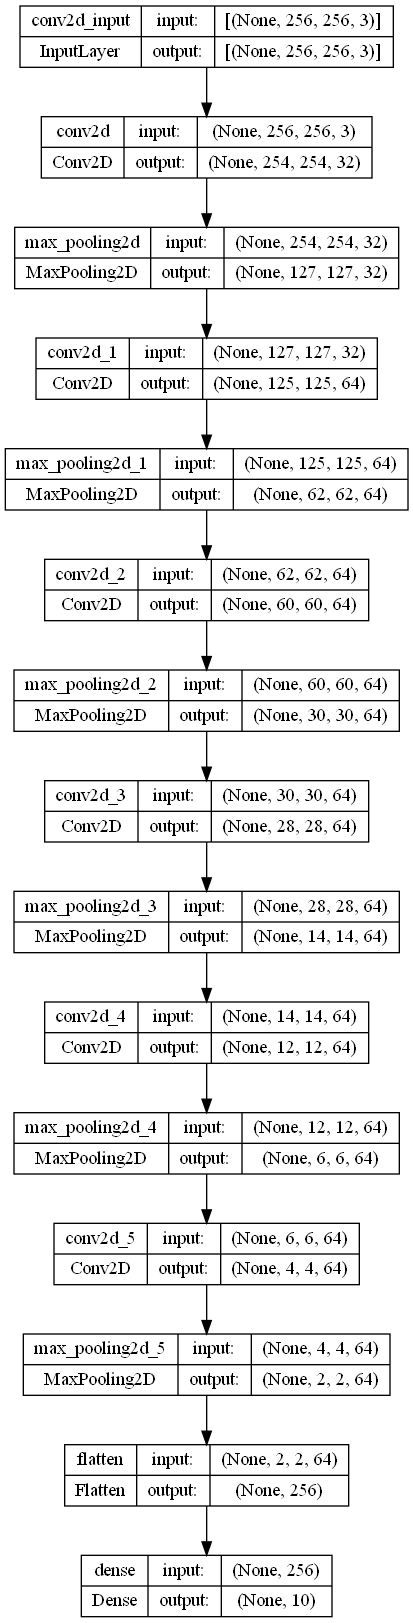

In [16]:
#Plot Model from tf
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="plot_model.png",show_shapes=True)

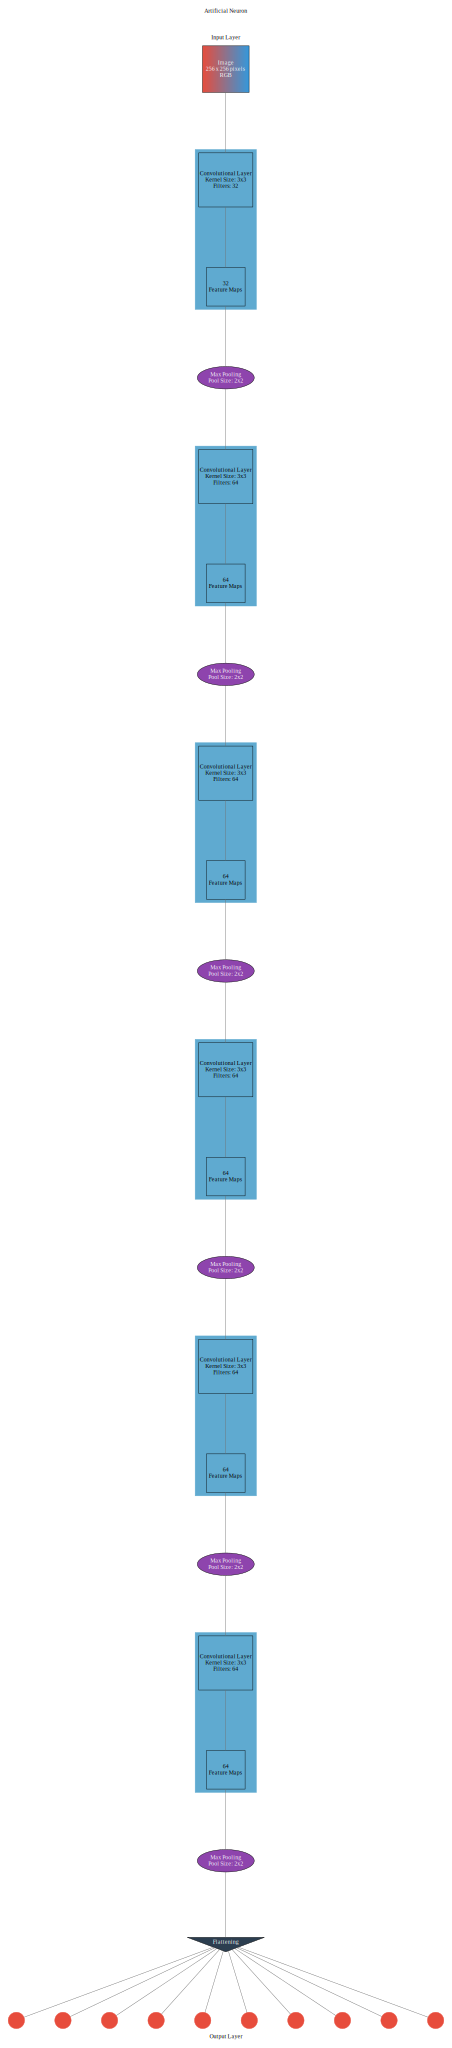

In [17]:
from ann_visualizer.visualize import ann_viz
import graphviz

# Usage
ann_viz(model,filename='my_ann_model.gv',title='Artificial Neuron')
graph_file = graphviz.Source.from_file('my_ann_model.gv')
graph_file

In [18]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [19]:
history = model.fit(x,y,epochs=50,validation_split= .1)

Epoch 1/50
39/39 [==============================] - 101s 2s/step - loss: 1.2682 - accuracy: 0.7212 - val_loss: 1.2706 - val_accuracy: 0.7059
Epoch 2/50
39/39 [==============================] - 85s 2s/step - loss: 1.0526 - accuracy: 0.7392 - val_loss: 1.2327 - val_accuracy: 0.7059
Epoch 3/50
39/39 [==============================] - 86s 2s/step - loss: 1.0957 - accuracy: 0.7392 - val_loss: 1.1483 - val_accuracy: 0.7059
Epoch 4/50
39/39 [==============================] - 80s 2s/step - loss: 1.0118 - accuracy: 0.7424 - val_loss: 1.1016 - val_accuracy: 0.7132
Epoch 5/50
39/39 [==============================] - 81s 2s/step - loss: 0.9578 - accuracy: 0.7506 - val_loss: 1.1055 - val_accuracy: 0.7132
Epoch 6/50
39/39 [==============================] - 83s 2s/step - loss: 0.8424 - accuracy: 0.7506 - val_loss: 1.1096 - val_accuracy: 0.7132
Epoch 7/50
39/39 [==============================] - 79s 2s/step - loss: 0.7570 - accuracy: 0.7735 - val_loss: 1.0250 - val_accuracy: 0.7206
Epoch 8/50
39/39 [=

In [20]:
model.save('ann_model.h5')

In [21]:
history

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

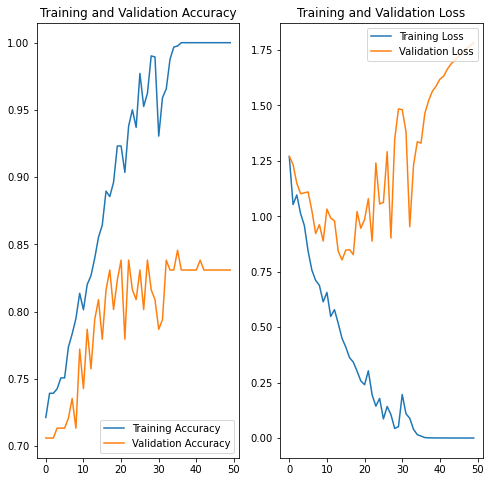

In [24]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

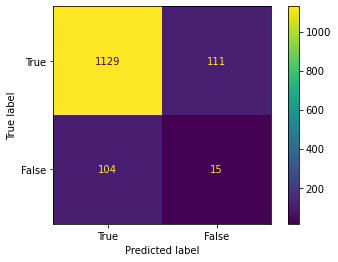

In [25]:
import matplotlib.pyplot as plt

from sklearn import metrics

actual = np.random.binomial(1,.1,size = 1359)
predicted = np.random.binomial(1,.1,size = 1359)


confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])

cm_display.plot()
plt.show()

In [26]:
Accuracy = metrics.accuracy_score(actual, predicted)
Accuracy

0.8417954378219279

In [27]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
Specificity

0.910483870967742

In [28]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
Sensitivity_recall

0.12605042016806722